In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
draft = pd.read_csv('Compound All Descriptors.csv')
draft.tail()

,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
283,439155,Inactive,0.0,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CSCCC(C(=O)O)...,10.690205,-1.170865,10.690205,0.211722,0.352410,384.418,...,0,0,1,0,0,0,0,0,1,0
284,257767,Inactive,0.0,C1=CC(=CC=C1N=NC2=CC(=C(C=C2N)N)N=NC3=CC=C(C=C...,12.509283,-3.800173,12.509283,0.034962,0.101424,640.758,...,0,0,0,2,0,0,2,0,0,0
285,281406,Inactive,0.0,CC(=O)C(C(=O)NC1=CC=C(C=C1)Cl)N=NC2=CC=C(C=C2)...,12.441214,-3.838339,12.441214,0.008609,0.374982,471.926,...,0,1,0,1,0,0,0,0,0,0
286,5472466,Inactive,0.0,C1=CC(=CC=C1C2=CC=C(O2)C=C3C(=NN4C(=NN=C4S3)CO...,14.604270,-0.642009,14.604270,0.003882,0.168894,666.776,...,0,0,1,0,0,0,0,0,0,0
287,5578857,Inactive,0.0,C1=CC(=C(C(=O)C2=C1C(=C(C(=C2O)O)O)Br)O)Br,11.932075,-0.865394,11.932075,0.048519,0.528724,377.972,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = draft.iloc[:, 4:]
df['Outcome'] = draft['PUBCHEM_ACTIVITY_OUTCOME']
print(df.columns)
print(len(df))

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_pyridine', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'Outcome'],
      dtype='object', length=187)
288


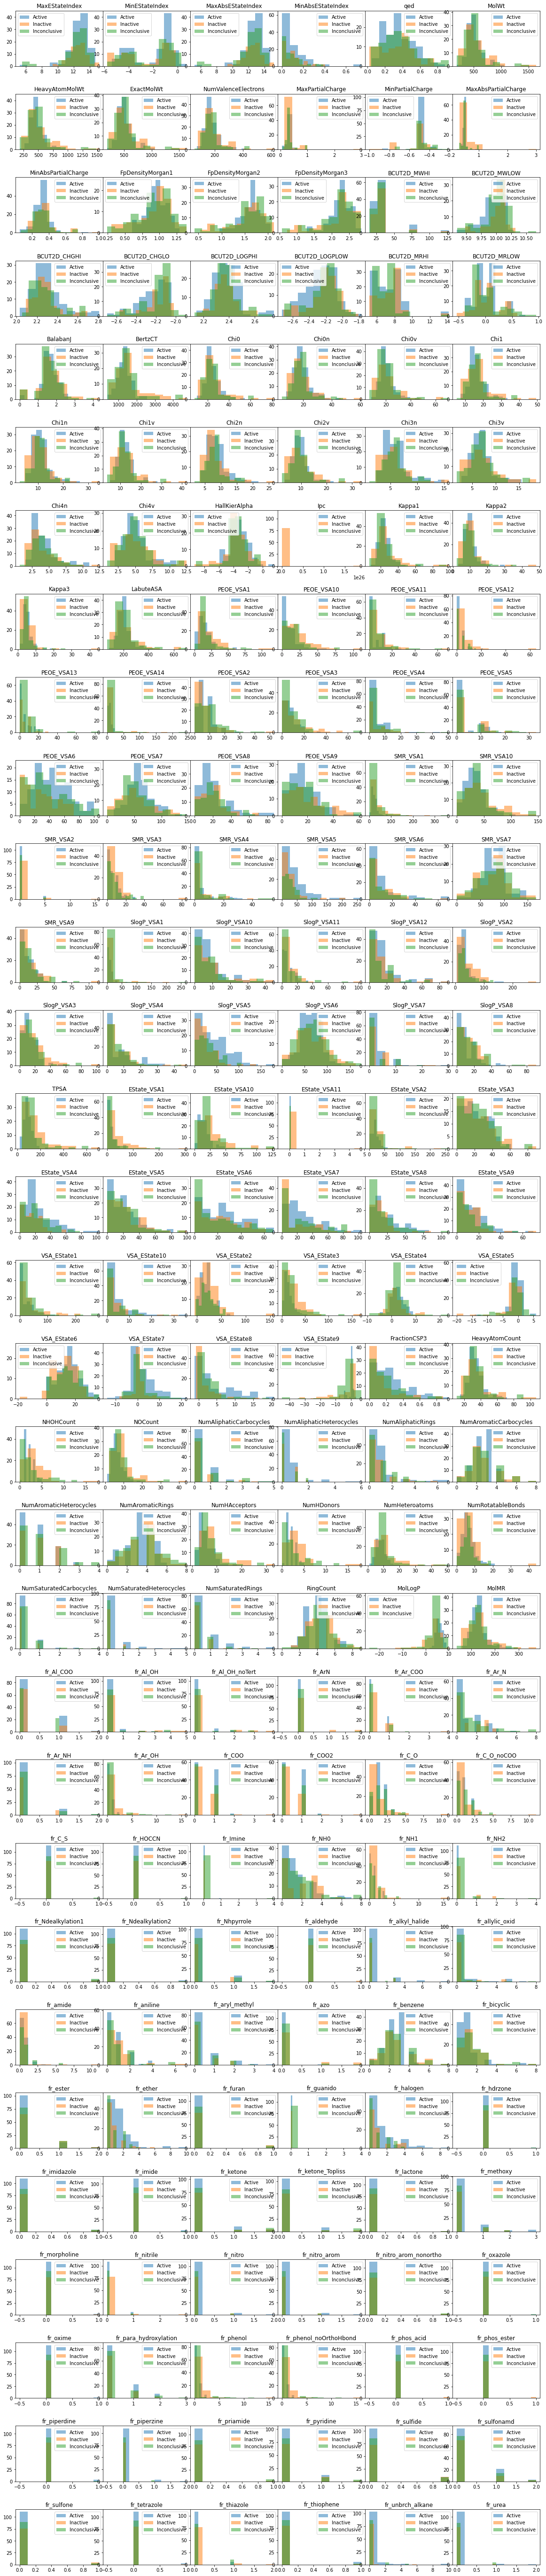

In [4]:
fig, axs = plt.subplots(31,6, figsize=(20, 100), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

colname = list(df.columns)

for i in range(186):
    
    for name, group in df.groupby('Outcome'):
        axs[i].hist(group[colname[i]], label=name, alpha = 0.5)
        axs[i].set_title(colname[i])
        axs[i].legend()

# plt.savefig('histogram distribution.png')

In [5]:
### Calculating KL Divergence
from scipy.special import rel_entr

# Pick the Ps and Qs
klact = df.loc[(df['Outcome'] == 'Active')]
klinact = df.loc[df['Outcome'] == 'Inactive']

In [6]:
def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'int64'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [7]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
print(df_cat.head(50))
print(df_cat.tail(30))

                         var  nunique
0        NumValenceElectrons       95
1             HeavyAtomCount       51
2             NumHeteroatoms       33
3                    NOCount       24
4              NumHAcceptors       23
5          NumRotatableBonds       21
6                  NHOHCount       15
7                 NumHDonors       14
8                  fr_phenol       11
9     fr_phenol_noOrthoHbond       11
10                  fr_Ar_OH       11
11                 RingCount       10
12               fr_bicyclic        9
13          NumAromaticRings        9
14          fr_unbrch_alkane        9
15                fr_halogen        9
16                    fr_NH0        9
17                   fr_Ar_N        8
18           fr_allylic_oxid        8
19         NumAliphaticRings        8
20                fr_benzene        8
21    NumAromaticCarbocycles        8
22                  fr_ether        8
23                fr_aniline        7
24                    fr_NH1        7
25          

In [8]:
from scipy.spatial import distance

In [9]:
# Calculate kl
kl_pq = []
for i in range(len(colname)-1):
    p = list(klact[colname[i]])[:len(klinact)]
    q = list(klinact[colname[i]])
#     print(len(p))
#     print(len(q))
    kl_pqs = rel_entr(p,q)
    sum_klpqs = sum(kl_pqs)
    kl_pq.append(sum_klpqs)
print(kl_pq)

[24.55961217915679, inf, 24.55961217915679, inf, 9.226242905572143, 1617.7956051540957, 959.5978094227809, 1604.8859161750152, 1061.702983348895, 1.347270129610218, inf, -3.643580474137494, 1.6686636131783474, 7.231237040240884, 11.447029141845382, 16.14138872611344, 1218.429504258732, -6.514934078730256, 2.5985619920278875, inf, 1.7950402101937657, inf, 26.177416092286364, inf, 131.7358641680786, -3173.4659879393166, 108.56127649686218, 217.6691633348036, 155.40670567282248, 88.39224686371091, 158.92764199754365, 92.26788876449628, 166.66544483703245, 110.18941751671451, 125.19096132357036, 88.58286582353601, 99.884019661171, 73.36133430508038, inf, 721631975643778.9, 128.5741120891536, 112.71698866405589, 96.4679734794458, 957.649804903853, 138.76236988197152, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -314.89273357853887, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 490.056622878811, inf, inf, inf, inf, inf, inf, -2451.051083122945, inf, -238.485

In [10]:
kl_qp = []
for i in range(len(colname)-1):
    p = list(klact[colname[i]])[:len(klinact)]
    q = list(klinact[colname[i]])
    kl_qps = rel_entr(q,p)
    sum_klqps = sum(kl_qps)
    kl_qp.append(sum_klqps)
print(kl_qp)
print(len(kl_qp))

[-0.6368889127428038, inf, -0.6368889127428038, inf, 7.156739246719675, 6152.78061841929, 6699.826085860663, 6146.456802222106, 1966.875736197815, 18.9789326375878, inf, 12.43283737589211, 7.2781569006388525, 0.5720437986761845, -0.7650055088477224, -1.8958047334343169, 621.7999792928726, 7.11919482509879, -1.171098490854832, inf, -1.0732373848949701, inf, 23.887068409639024, inf, 78.08789008027155, 35459.11865635423, 288.92505280229244, 112.66524723289157, 180.4973005565511, 156.97440013714115, 36.542550032850116, 122.07437604862595, 17.31232286159732, 91.9263860626988, 13.063479644373494, 59.824488884494045, 14.525789369708571, 44.23583070976208, inf, 8.751324503987662e+27, 372.3297566295746, 126.42137321472805, 141.35382358940674, 2154.3585744351008, 1539.2965000480278, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -32.881894137363986, inf, inf, 3527.035731026974, inf, inf, inf, inf, inf, inf, 513.746022909101, inf, inf, inf, inf, inf, 2757.59950819135, inf, inf, inf, 1180.54033

In [11]:
kl_diver = pd.DataFrame(
    {'colname': list(klact.columns)[:186],
     'kl_pq': kl_pq,
     'kl_qp': kl_qp
    })

kl_diver

,colname,kl_pq,kl_qp
0,MaxEStateIndex,24.559612,-0.636889
1,MinEStateIndex,inf,inf
2,MaxAbsEStateIndex,24.559612,-0.636889
3,MinAbsEStateIndex,inf,inf
4,qed,9.226243,7.156739
...,...,...,...
181,fr_tetrazole,0.000000,inf
182,fr_thiazole,inf,inf
183,fr_thiophene,inf,inf
184,fr_unbrch_alkane,inf,inf


### js_divergence

In [12]:
#generate discrete df
disact = klact.iloc[:,-67:]
disinact = klinact.iloc[:,-67:]
discol = disact.columns
print(discol)
print(disinact.columns)

Index(['fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO',
       'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
       'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1',
       'fr_NH2', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole',
       'fr_aldehyde', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide',
       'fr_aniline', 'fr_aryl_methyl', 'fr_azo', 'fr_benzene', 'fr_bicyclic',
       'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen',
       'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone',
       'fr_ketone_Topliss', 'fr_lactone', 'fr_methoxy', 'fr_morpholine',
       'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho',
       'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol',
       'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester',
       'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_pyridine',
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_tetrazol

In [34]:
# js divergence for discrete descriptors
import scipy
from scipy import stats
from statistics import mode

discrete_div = []
for i in range(len(discol)-1):
    try:
        p = list(disact[discol[i]])
        q = list(disinact[discol[i]])
        num = statistics.mode(q)
        mode_list = [num] * 33
        q.extend(mode_list)
        p2 = scipy.stats.gaussian_kde(p)
        q2 = scipy.stats.gaussian_kde(q)
        p2 = p2.evaluate(p)
        q2 = q2.evaluate(q)
        js_div = distance.jensenshannon(p2,q2)
        discrete_div.append(js_div)
    except:
        print(discol[i]+' singular matrix')
        discrete_div.append(np.nan)
print(discrete_div)
print(len(discrete_div))

fr_ArN singular matrix
fr_C_S singular matrix
fr_HOCCN singular matrix
fr_Imine singular matrix
fr_aldehyde singular matrix
fr_guanido singular matrix
fr_hdrzone singular matrix
fr_imide singular matrix
fr_oxazole singular matrix
fr_oxime singular matrix
fr_phos_acid singular matrix
fr_phos_ester singular matrix
fr_piperdine singular matrix
fr_piperzine singular matrix
[0.21023290076533632, 0.22859921354063412, 0.22214199174921756, nan, 0.21741012726329864, 0.27448047793267655, 0.17941784656744683, 0.2554920898327533, 0.17860780964545156, 0.17860780964545156, 0.23866140598688965, 0.23194413357868715, nan, nan, nan, 0.24781770692250968, 0.22214898999471663, 0.17970496812378856, 0.13451070767281628, 0.1035866444694088, 0.17941784656744683, nan, 0.19683810280854447, 0.24555766848827693, 0.23131689679959871, 0.24349642009241781, 0.2775075209352568, 0.1694694492802813, 0.25228176020739473, 0.2546667160203388, 0.2275975560969517, 0.2655739551555376, 0.13959555321368738, nan, 0.28408180776497

In [35]:
# create discrete descriptors divergence df
dis_diver = pd.DataFrame(
    {'colname': list(disact.columns)[:-1],
     'js_divergence': discrete_div
    })

dis_diver = dis_diver.sort_values(by='js_divergence', ascending=False).reset_index(drop=True)
dis_diver

,colname,js_divergence
0,fr_halogen,0.284082
1,fr_aryl_methyl,0.277508
2,fr_Ar_N,0.274480
3,fr_ether,0.265574
4,fr_phenol,0.256633
...,...,...
61,fr_oxime,NaN
62,fr_phos_acid,NaN
63,fr_phos_ester,NaN
64,fr_piperdine,NaN


In [36]:
print(dis_diver.head(50))
print(dis_diver.tail(16))

                   colname  js_divergence
0               fr_halogen       0.284082
1           fr_aryl_methyl       0.277508
2                  fr_Ar_N       0.274480
3                 fr_ether       0.265574
4                fr_phenol       0.256633
5   fr_phenol_noOrthoHbond       0.256205
6                 fr_Ar_OH       0.255492
7              fr_bicyclic       0.254667
8               fr_benzene       0.252282
9                   fr_NH0       0.247818
10         fr_allylic_oxid       0.245558
11              fr_aniline       0.243496
12                  fr_C_O       0.238661
13   fr_para_hydroxylation       0.238395
14              fr_methoxy       0.237443
15            fr_C_O_noCOO       0.231944
16                fr_amide       0.231317
17                fr_Al_OH       0.228599
18                fr_ester       0.227598
19            fr_sulfonamd       0.225198
20                  fr_NH1       0.222149
21         fr_Al_OH_noTert       0.222142
22               fr_Ar_COO       0

In [16]:
# js_divergence for continuous descriptors
conact = klact.iloc[:,:-67]
coninact = klinact.iloc[:,:-67]
concol = conact.columns
print(concol)
print(coninact.columns)

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedRings', 'RingCount', 'MolLogP', 'MolMR'],
      dtype='object', length=120)
Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedRings', 'RingCount', 'MolLogP', 'MolMR'],
      dtype='object', length=120)


In [17]:
import statistics
contin_div = []
for i in range(len(concol)):
    try:
        p = list(conact[concol[i]])
        q = list(coninact[concol[i]])
        num = statistics.mode(q)
        mode_list = [num] * 33
        q.extend(mode_list)
        p2 = scipy.stats.gaussian_kde(p)
        q2 = scipy.stats.gaussian_kde(q)
        p2 = p2.evaluate(p)
        q2 = q2.evaluate(q)
        js_div = distance.jensenshannon(p2,q2)
        contin_div.append(js_div)
    except:
        print('singular matrix')
        contin_div.append(np.nan)
    
print(contin_div)
print(len(contin_div))

singular matrix
[0.25662705725028384, 0.17427329691018104, 0.25662705725028384, 0.27863197760478087, 0.2498789717730179, 0.2610145162830883, 0.262644481008571, 0.26088781496997615, 0.2634610406984314, 0.20608768585946288, 0.25703222848666774, 0.21524584024040913, 0.26844758018324494, 0.2565049509417769, 0.25587394547269876, 0.28935119035527007, 0.20996854358896713, 0.24625462068739923, 0.2836310491124592, 0.2375221368530095, 0.301843089678613, 0.2627086920171925, 0.16828432342553226, 0.2845861872597108, 0.24047915697275585, 0.23717904052094033, 0.2712343346999279, 0.2625410380051269, 0.24456482829135326, 0.2707209542778568, 0.25568321591403675, 0.25659849882664487, 0.25192405203555646, 0.2410450228805945, 0.248457970839908, 0.22569965470150874, 0.24561208298668222, 0.22750048866222836, 0.26936552985196927, 0.10453126539420071, 0.24364914580244704, 0.23559070096433296, 0.21963381879856186, 0.26920009029787983, 0.2508136630651993, 0.21439065872677676, 0.24737871383494925, 0.2523801138786

In [18]:
# create continuous descriptors divergence df
con_diver = pd.DataFrame(
    {'colname': list(conact.columns),
     'js_divergence': contin_div
    })

con_diver = con_diver.sort_values(by='js_divergence', ascending=False).reset_index(drop=True)
con_diver.head(50)

,colname,js_divergence
0,VSA_EState7,0.322724
1,PEOE_VSA4,0.321730
2,BCUT2D_LOGPHI,0.301843
3,VSA_EState9,0.295273
4,FpDensityMorgan3,0.289351
5,SMR_VSA4,0.284939
6,BCUT2D_MRLOW,0.284586
7,BCUT2D_CHGHI,0.283631
8,EState_VSA7,0.282990
9,NumAliphaticRings,0.278816


In [39]:
# Combine two dataset
df_jsdiv = dis_diver.append(con_diver)
df_jsdiv = df_jsdiv.sort_values(by='js_divergence', ascending=False).reset_index(drop=True)
df_jsdiv

,colname,js_divergence
0,VSA_EState7,0.322724
1,PEOE_VSA4,0.321730
2,BCUT2D_LOGPHI,0.301843
3,VSA_EState9,0.295273
4,FpDensityMorgan3,0.289351
...,...,...
181,fr_phos_acid,NaN
182,fr_phos_ester,NaN
183,fr_piperdine,NaN
184,fr_piperzine,NaN


### Compare the results with RF feature importance

In [61]:
# Read Random Forest Feature Importance Table
rf_imp = pd.read_csv('Random Forest Feature Importance.csv')
rf_imp

,Features,Importance
0,VSA_EState9,0.054804
1,MolMR,0.040831
2,Chi2v,0.030094
3,PEOE_VSA10,0.025264
4,SlogP_VSA12,0.024827
...,...,...
181,fr_imidazole,0.000000
182,fr_Ar_COO,0.000000
183,fr_nitrile,0.000000
184,VSA_EState7,0.000000


In [77]:
# Join two dataframes according to the column name
## Rename colname to Features
df_jsdiv2 = df_jsdiv.rename(columns = {'colname': 'Features'}, inplace = False)
compare_imp = pd.merge(df_jsdiv2, rf_imp, on="Features").fillna(0)
compare_imp['diff'] = np.subtract(compare_imp['js_divergence'], compare_imp['Importance'])
compare_imp = compare_imp.rename(columns = {'Importance': 'RF Feature Importance'}, inplace = False)
compare_imp = compare_imp.sort_values(by='js_divergence', ascending=False).reset_index(drop=True)
compare_imp

,Features,js_divergence,RF Feature Importance,diff
0,VSA_EState7,0.322724,0.000000,0.322724
1,PEOE_VSA4,0.321730,0.000000,0.321730
2,BCUT2D_LOGPHI,0.301843,0.012674,0.289169
3,VSA_EState9,0.295273,0.054804,0.240469
4,FpDensityMorgan3,0.289351,0.008917,0.280434
...,...,...,...,...
181,fr_Imine,0.000000,0.000000,0.000000
182,fr_HOCCN,0.000000,0.000000,0.000000
183,fr_C_S,0.000000,0.002700,-0.002700
184,fr_ArN,0.000000,0.000318,-0.000318


In [78]:
compare_imp.head(60)

,Features,js_divergence,RF Feature Importance,diff
0,VSA_EState7,0.322724,0.000000,0.322724
1,PEOE_VSA4,0.321730,0.000000,0.321730
2,BCUT2D_LOGPHI,0.301843,0.012674,0.289169
3,VSA_EState9,0.295273,0.054804,0.240469
4,FpDensityMorgan3,0.289351,0.008917,0.280434
5,SMR_VSA4,0.284939,0.009812,0.275126
6,BCUT2D_MRLOW,0.284586,0.012177,0.272409
7,fr_halogen,0.284082,0.000000,0.284082
8,BCUT2D_CHGHI,0.283631,0.005821,0.277810
9,EState_VSA7,0.282990,0.003121,0.279868


In [21]:
# pd.set_option('display.max_columns', None)
# kl_diver.to_csv('kl_diver.csv', index = False)

In [74]:
compare_imp.js_divergence.describe()

count    186.000000
mean       0.209938
std        0.076951
min        0.000000
25%        0.196944
50%        0.235381
75%        0.256632
max        0.322724
Name: js_divergence, dtype: float64

In [73]:
compare_imp.Importance.describe()

count    186.000000
mean       0.005376
std        0.007120
min        0.000000
25%        0.000458
50%        0.003464
75%        0.008549
max        0.054804
Name: Importance, dtype: float64

94


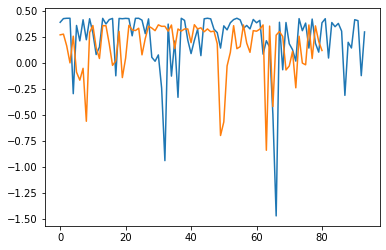

In [23]:
from sklearn.neighbors import KernelDensity
p2 = np.reshape(np.ravel(p), (-1,1))[20:]
print(len(p2))
q2 = np.reshape(np.ravel(q), (-1,1))
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(p2)
kde3 = KernelDensity(kernel='gaussian',bandwidth=0.2).fit(q2)
# X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
kde2 = kde.score_samples(p2)
kde3 = kde3.score_samples(q2)
# kde2 = np.exp(kde2)
plt.plot(kde2)
plt.plot(kde3)

In [24]:
# QED
p = list(klact['qed'])[1:82]
q = list(klinact['qed'])
kl_pq = rel_entr(p, q)
print(kl_pq)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

kl_qp = rel_entr(klinact['qed'], klact['qed'])
print(kl_qp)
print('KL(P || Q): %.3f nats' % sum(kl_qp))

[ 0.49845398  0.01957399 -0.04247795  0.18233709  0.33936533  0.25644419
  0.47290118 -0.11062832 -0.1447055   0.24655258 -0.08779198  0.04710031
  1.07917839 -0.0869888  -0.1021258   0.03864941  0.19136353  0.94746583
 -0.13728359  0.50517888  0.47709899  0.06226118 -0.06229682  0.30864847
 -0.00259805 -0.19944345 -0.07518902  0.16185136  0.07346694 -0.01958454
 -0.11409622 -0.08922027 -0.01935345  0.00486014 -0.0428693  -0.14848444
 -0.13547448 -0.08541803 -0.07820598 -0.06855213  0.30467952 -0.09897663
 -0.0487173  -0.05386124 -0.11164296 -0.14135385 -0.05368104 -0.15623102
  0.09880208 -0.23116018 -0.04614185  1.87275125  0.55467187  0.4873744
 -0.19171405  1.05412172  0.00329999 -0.0867237   0.75287603  0.16258689
 -0.15685644  0.30167228 -0.129097   -0.27637383 -0.02798988 -0.24003007
  0.03121299 -0.15067962 -0.03261131 -0.21476698  0.24873701  0.21327247
  1.1658147  -0.09699965 -0.19146317  0.8120362  -0.08257701  0.716946
 -0.05845129  0.39530144 -0.17088858]
KL(P || Q): 10.1